In [52]:
# Forces the notebook to always reload packages.
%reload_ext autoreload
%autoreload 2

## Dataset loading

### Regular dataset loading

In [53]:
from python_proj.utils.util import Counter
import python_proj.utils.exp_utils as exp_utils

# Defines a number of constants.

file_name = "dataset_transformed"
base_path = exp_utils.BASE_PATH
data_path = f"{base_path}/final_data/{file_name}.csv"
figure_base_path = f"{base_path}/figures/modelling/{file_name}/rf_ftc/"

# Meta stuff.
pr_merged_key = "PullRequestIsMerged"
ftc_key = "SubmitterIsFirstTimeContributor"
seed_counter = Counter()

In [54]:
import pandas as pd
import numpy as np
import json


# Loads regular dataframe.
df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)

# Creates sub-datasets.
metadata_fields = ["ID", "Project Name", "Submitter ID", "PR Number", "Closed At"]
dependent_fields = [pr_merged_key]

df.describe()

,ID,Submitter ID,PR Number,IntraProjectSubmitterPullRequestSuccessRate,EcosystemExperienceSubmitterPullRequestSuccessRate,DependencyEcosystemExperienceSubmitterPullRequestSuccessRate,NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,ln(1 + ControlPullRequestLifeTimeInMinutes),ln(1 + ControlNumberOfCommitsInPullRequest),...,ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + WeightedEcosystemSecondOrderDegreeCentrality),ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality),ln(1 + EcosystemLinkIntensity),ln(1 + IntraProjectLinkIntensity)
count,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,...,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06,1.216221e+06
mean,1.473092e+08,5.092504e+06,8.089130e+02,5.029367e-01,4.028501e-01,9.853429e-02,3.751776e-01,5.922709e-02,4.195426e-01,1.183858e-01,...,1.144450e-02,1.968795e-02,7.962418e-02,1.344287e-01,9.542167e-03,1.752697e-02,6.396780e-02,6.040052e-02,2.195312e-02,4.472791e-02
std,9.954409e+07,7.968202e+06,2.304617e+03,4.710606e-01,4.523397e-01,2.907111e-01,4.479337e-01,2.285036e-01,2.256901e-01,7.147764e-02,...,5.396848e-02,8.007560e-02,1.179799e-01,1.750052e-01,5.263118e-02,8.245257e-02,9.934566e-02,1.002992e-01,8.741610e-02,1.013945e-01
min,6.870000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.924867e+07,4.674710e+05,5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.365158e-01,7.525668e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.366714e+08,1.633887e+06,1.990000e+02,6.800000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.433349e-01,7.525668e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,7.753347e-02,0.000000e+00,0.000000e+00,8.453635e-03,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.260994e+08,6.254382e+06,6.840000e+02,1.000000e+00,9.391304e-01,0.000000e+00,9.230769e-01,0.000000e+00,5.863557e-01,1.505134e-01,...,0.000000e+00,0.000000e+00,1.416667e-01,2.326004e-01,0.000000e+00,0.000000e+00,9.892883e-02,8.837267e-02,0.000000e+00,2.582313e-02
max,3.617756e+08,5.973444e+07,8.297600e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [55]:
print(list(df.columns))

['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At', 'PullRequestIsMerged', 'ControlIntegratedBySameUser', 'ControlPullRequestHasComments', 'ControlPullRequestHasCommentByExternalUser', 'ControlHasHashTagInDescription', 'IntraProjectSubmitterPullRequestSuccessRate', 'EcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'SubmitterIsFirstTimeContributor', 'ln(1 + ControlPullRequestLifeTimeInMinutes)', 'ln(1 + ControlNumberOfCommitsInPullRequest)', 'ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)', 'ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)', 'ln(1 + IntraProjectSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystem

In [56]:
# Identifieds independent / predictor fields.


def is_independent_field(field: str) -> bool:
    return field not in metadata_fields and field != pr_merged_key


independent_fields = list(filter(is_independent_field, df.columns))

In [57]:
# Calculates class imbalance.
class_counts = df[pr_merged_key].value_counts()
class_imbalance = class_counts[True] / class_counts[False]
print(f"{class_imbalance=}")

class_imbalance=3.6991542286634957


### Sample only PRs by first-time contributors

In [58]:
# Filters data
df = df[df[ftc_key] == True]
df = df.drop([ftc_key], axis=1)
independent_fields.remove(ftc_key)
print(f"{len(df)=}")

# Recalculates class imbalance.
class_counts = df[pr_merged_key].value_counts()
class_imbalance = class_counts[True] / class_counts[False]
print(f"{class_imbalance=}")

# Resets indices.
df = df.reset_index(drop=True)
print(independent_fields)

df.describe()

len(df)=426832
class_imbalance=1.9236870766006124
['ControlIntegratedBySameUser', 'ControlPullRequestHasComments', 'ControlPullRequestHasCommentByExternalUser', 'ControlHasHashTagInDescription', 'IntraProjectSubmitterPullRequestSuccessRate', 'EcosystemExperienceSubmitterPullRequestSuccessRate', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + ControlPullRequestLifeTimeInMinutes)', 'ln(1 + ControlNumberOfCommitsInPullRequest)', 'ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)', 'ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)', 'ln(1 + IntraProjectSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosy

,ID,Submitter ID,PR Number,IntraProjectSubmitterPullRequestSuccessRate,EcosystemExperienceSubmitterPullRequestSuccessRate,DependencyEcosystemExperienceSubmitterPullRequestSuccessRate,NonDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate,ln(1 + ControlPullRequestLifeTimeInMinutes),ln(1 + ControlNumberOfCommitsInPullRequest),...,ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount),ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueCommentCount),ln(1 + WeightedEcosystemSecondOrderDegreeCentrality),ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality),ln(1 + EcosystemLinkIntensity),ln(1 + IntraProjectLinkIntensity)
count,4.268320e+05,4.268320e+05,426832.000000,426832.0,426832.000000,426832.000000,426832.000000,426832.000000,426832.000000,426832.000000,...,426832.000000,426832.000000,426832.000000,426832.000000,426832.000000,426832.000000,426832.000000,426832.000000,426832.000000,426832.000000
mean,1.213651e+08,5.131872e+06,584.979807,0.0,0.265203,0.023931,0.256362,0.024847,0.491480,0.106394,...,0.002768,0.004929,0.057686,0.094571,0.004174,0.007872,0.048752,0.007892,0.012933,0.006278
std,9.542933e+07,8.008834e+06,1733.884021,0.0,0.409386,0.149548,0.405401,0.150628,0.223246,0.060923,...,0.025482,0.040209,0.101355,0.149757,0.033526,0.054303,0.088964,0.036228,0.064506,0.027593
min,1.153000e+03,1.000000e+00,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.799896e+07,4.987750e+05,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.334352,0.075257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.011235e+08,1.681449e+06,122.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.502926,0.075257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.888974e+08,6.317507e+06,469.000000,0.0,0.666667,0.000000,0.647059,0.000000,0.662211,0.119279,...,0.000000,0.000000,0.089382,0.155067,0.000000,0.000000,0.064858,0.000000,0.000000,0.000000
max,3.617756e+08,5.973444e+07,82976.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.759557,1.000000,1.000000,1.000000,1.000000,0.999543,1.000000,0.824499,0.951250,0.646942


## Model Creation

In [59]:
k = 5
print(f"Using {k=} folds.")

Using k=5 folds.


Generates a number of feature groups that are relevant later in the pipeline:
- control variables
- intra-project experience
- ecosystem experience
- dependency ecosystem experience
- inverse dependency ecosystem experience
- non-dependency ecosystem experience
- collaboration variables

In [60]:
from enum import Enum
from python_proj.utils.util import get_matching

# Defines feature groups


class FeatureGroups(Enum):
    Control = 1
    Intra = 2
    Eco = 3
    DEco = 4
    IDEco = 5
    NDEco = 6
    Coll = 7


var_group_regex_patterns = [
    (FeatureGroups.Control, r".*Control.*"),
    (
        FeatureGroups.Intra,
        r"^(?:(?!Control|Degree|Link).)*Intra(?:(?!Control|Degree|Link).)*$",
    ),
    (FeatureGroups.Eco, r"^(?:(?!Dependency).)*Ecosystem(?:(?!Degree|Link).)*$"),
    (FeatureGroups.DEco, r"^(?!.*(Inverse|Non)).*(?=Dependency).*"),
    (FeatureGroups.IDEco, r".*(?=Inverse).*"),
    (FeatureGroups.NDEco, r".*(?=NonDependency).*"),
    (FeatureGroups.Coll, r"^(?:(?!Intra).)*(Weighted|LinkIntensity)(?:(?!Intra).)*$"),
]

# Resolves the regex patterns to generate lists of fields.
var_groups = {
    str(name): list(get_matching(independent_fields, pattern))
    for name, pattern in var_group_regex_patterns
}


print("Feature groups:")
print(json.dumps(var_groups, indent=2))

Feature groups:
{
  "FeatureGroups.Control": [
    "ControlIntegratedBySameUser",
    "ControlPullRequestHasComments",
    "ControlPullRequestHasCommentByExternalUser",
    "ControlHasHashTagInDescription",
    "ln(1 + ControlPullRequestLifeTimeInMinutes)",
    "ln(1 + ControlNumberOfCommitsInPullRequest)",
    "ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)"
  ],
  "FeatureGroups.Intra": [
    "IntraProjectSubmitterPullRequestSuccessRate",
    "ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)",
    "ln(1 + IntraProjectSubmitterPullRequestCommentCount)",
    "ln(1 + IntraProjectSubmitterIssueSubmissionCount)",
    "ln(1 + IntraProjectSubmitterIssueCommentCount)"
  ],
  "FeatureGroups.Eco": [
    "EcosystemExperienceSubmitterPullRequestSuccessRate",
    "ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)",
    "ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)",
    "ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)",
    "ln(1 + Ecosyst

In [61]:
from wmutils.collections.list_access import flatten


def get_feature_groups(*feature_groups) -> list[str]:
    return list(flatten(var_groups[str(group)] for group in feature_groups))

### Full Model

In [62]:
from python_proj.modelling.notebooks.random_forest.rf_functions import (
    kfold_rf_evaluation,
)

f1_scores, f1_mean, f1_std = kfold_rf_evaluation(
    df, independent_fields, k, pr_merged_key, seed_counter
)

print("\nPerformance metrics full model:")
print(f"{f1_scores=}")
print(f"{f1_mean=}, {f1_std=}")

random_state=43
random_state=43
random_state=43random_state=43

random_state=43


metrics={'accuracy': 0.7402830166576857, 'precision': 0.7844895364592918, 'recall': 0.8346860316104229, 'f1': 0.8088097065443287}

Confusion matrix:
[[16299 12883]
 [ 9288 46896]]

Classification report:
              precision    recall  f1-score   support

       False       0.64      0.56      0.60     29182
        True       0.78      0.83      0.81     56184

    accuracy                           0.74     85366
   macro avg       0.71      0.70      0.70     85366
weighted avg       0.73      0.74      0.74     85366

metrics={'accuracy': 0.7374481643745754, 'precision': 0.7813761147924867, 'recall': 0.8357135244591282, 'f1': 0.8076318974174113}

Confusion matrix:
[[15904 13164]
 [ 9249 47049]]

Classification report:
              precision    recall  f1-score   support

       False       0.63      0.55      0.59     29068
        True       0.78      0.84      0.81     56298

    accuracy                           0.74     85366
   macro avg       0.71      0.69      0.70    

metrics={'accuracy': 0.7676619771105931, 'precision': 0.7932627091273173, 'recall': 0.8747729458275457, 'f1': 0.8320262877081251}

Confusion matrix:
[[16411 12802]
 [ 7032 49122]]

Classification report:
              precision    recall  f1-score   support

       False       0.70      0.56      0.62     29213
        True       0.79      0.87      0.83     56154

    accuracy                           0.77     85367
   macro avg       0.75      0.72      0.73     85367
weighted avg       0.76      0.77      0.76     85367

metrics={'accuracy': 0.7653308655569482, 'precision': 0.7913087009883083, 'recall': 0.8732868777957976, 'f1': 0.8302791544880757}

Confusion matrix:
[[16333 12923]
 [ 7110 49001]]

Classification report:
              precision    recall  f1-score   support

       False       0.70      0.56      0.62     29256
        True       0.79      0.87      0.83     56111

    accuracy                           0.77     85367
   macro avg       0.74      0.72      0.73    

### Control + Intra-project Model

In [63]:
contr_with_intra = get_feature_groups(FeatureGroups.Control, FeatureGroups.Intra)
print(contr_with_intra)

f1_scores, f1_mean, f1_std = kfold_rf_evaluation(
    df, contr_with_intra, k, pr_merged_key, seed_counter
)

print("\nPerformance metrics control + intra model:")
print(f"{f1_scores=}")
print(f"{f1_mean=}, {f1_std=}")

['ControlIntegratedBySameUser', 'ControlPullRequestHasComments', 'ControlPullRequestHasCommentByExternalUser', 'ControlHasHashTagInDescription', 'ln(1 + ControlPullRequestLifeTimeInMinutes)', 'ln(1 + ControlNumberOfCommitsInPullRequest)', 'ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)', 'IntraProjectSubmitterPullRequestSuccessRate', 'ln(1 + IntraProjectSubmitterPullRequestSubmissionCount)', 'ln(1 + IntraProjectSubmitterPullRequestCommentCount)', 'ln(1 + IntraProjectSubmitterIssueSubmissionCount)', 'ln(1 + IntraProjectSubmitterIssueCommentCount)']


random_state=45random_state=45
random_state=45random_state=45


random_state=45
metrics={'accuracy': 0.7346867056356672, 'precision': 0.7766056109436587, 'recall': 0.8365832337252244, 'f1': 0.8054794520547945}

Confusion matrix:
[[15825 13489]
 [ 9160 46893]]

Classification report:
              precision    recall  f1-score   support

       False       0.63      0.54      0.58     29314
        True       0.78      0.84      0.81     56053

    accuracy                           0.73     85367
   macro avg       0.70      0.69      0.69     85367
weighted avg       0.73      0.73      0.73     85367

metrics={'accuracy': 0.7402830166576857, 'precision': 0.7844895364592918, 'recall': 0.8346860316104229, 'f1': 0.8088097065443287}

Confusion matrix:
[[16299 12883]
 [ 9288 46896]]

Classification report:
              precision    recall  f1-score   support

       False       0.64      0.56      0.60     29182
        True       0.78      0.83      0.81     56184

    accuracy         

### Collaboration and Ecosystem Model

In [64]:
non_control_intra_fields = get_feature_groups(
    FeatureGroups.Eco,
    FeatureGroups.DEco,
    FeatureGroups.IDEco,
    FeatureGroups.NDEco,
    FeatureGroups.Coll,
)
print(non_control_intra_fields)

f1_scores, f1_mean, f1_std = kfold_rf_evaluation(
    df, non_control_intra_fields, k, pr_merged_key, seed_counter
)

print("\nPerformance metrics non-control model:")
print(f"{f1_scores=}")
print(f"{f1_mean=}, {f1_std=}")

['EcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + EcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + EcosystemExperienceSubmitterIssueCommentCount)', 'DependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + DependencyEcosystemExperienceSubmitterIssueCommentCount)', 'InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)', 'ln(1 + InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)', 'ln(1 + InversedDependencyEcosyste

random_state=47
random_state=47
random_state=47random_state=47
random_state=47

metrics={'accuracy': 0.6383262853327398, 'precision': 0.6589771710219465, 'recall': 0.9318692288495134, 'f1': 0.7720173968263344}

Confusion matrix:
[[ 2216 27053]
 [ 3822 52276]]

Classification report:
              precision    recall  f1-score   support

       False       0.37      0.08      0.13     29269
        True       0.66      0.93      0.77     56098

    accuracy                           0.64     85367
   macro avg       0.51      0.50      0.45     85367
weighted avg       0.56      0.64      0.55     85367

metrics={'accuracy': 0.6401419752363325, 'precision': 0.6589421857141062, 'recall': 0.9363543879062628, 'f1': 0.7735281541659909}

Confusion matrix:
[[ 2184 27154]
 [ 3566 52463]]

Classification report:
              precision    recall  f1-score   support

       False       0.38      0.07      0.12     29338
        True       0.66      0.94      0.77     56029

    accuracy         

## Feature Explanation and Evaluation

### Model Creation

In [65]:
from sklearn.model_selection import train_test_split

from python_proj.modelling.notebooks.random_forest.rf_functions import create_model


train, test = train_test_split(df, test_size=0.2, shuffle=True)
train_predictors = train[independent_fields]
train_dependent = train[pr_merged_key]
test_predictors = test[independent_fields]
test_dependent = test[pr_merged_key]


full_rf_model, _ = create_model(
    train_predictors, train_dependent, test_predictors, test_dependent, seed_counter
)

random_state=49
metrics={'accuracy': 0.7656471470240257, 'precision': 0.790303578057165, 'recall': 0.8747253532448509, 'f1': 0.8303742517508605}

Confusion matrix:
[[16393 12993]
 [ 7013 48968]]

Classification report:
              precision    recall  f1-score   support

       False       0.70      0.56      0.62     29386
        True       0.79      0.87      0.83     55981

    accuracy                           0.77     85367
   macro avg       0.75      0.72      0.73     85367
weighted avg       0.76      0.77      0.76     85367



### Mean decrease in Impurity

/tmp/ipykernel_1550/1648129876.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


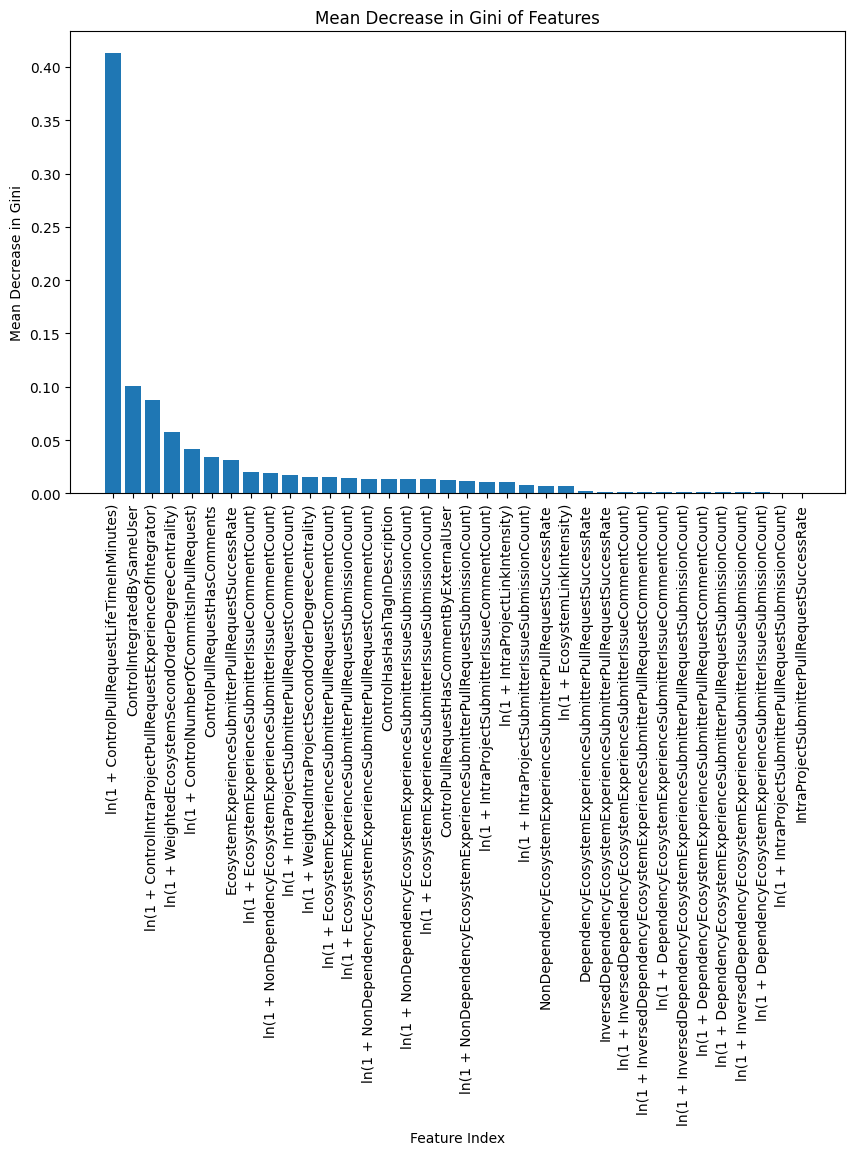

In [66]:
from matplotlib import pyplot as plt

feature_importances = full_rf_model.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]

# Step 4: Plot the mean decrease accuracy plot
plt.figure(figsize=(10, 6))
plt.bar(range(test_predictors.shape[1]), sorted_importances)
plt.xlabel("Feature Index")
plt.ylabel("Mean Decrease in Gini")
plt.title("Mean Decrease in Gini of Features")
ordererd_columns = np.array(test_predictors.columns)[sorted_indices]
plt.xticks(range(test_predictors.shape[1]), ordererd_columns, rotation=90)
plt.tight_layout()
plt.show()

In [67]:
# Stores feature importances in file.
output_file = f"{figure_base_path}/feature_importance.txt"
with open(output_file, "w+", encoding="utf-8") as output_file:
    for field, importance in zip(ordererd_columns, sorted_importances):
        entry = f"{field}: {importance}"
        output_file.write(f'{entry}\n')
        print(entry)

ln(1 + ControlPullRequestLifeTimeInMinutes): 0.412781567230588
ControlIntegratedBySameUser: 0.10050801783906539
ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator): 0.08739779770822367
ln(1 + WeightedEcosystemSecondOrderDegreeCentrality): 0.0576784015276453
ln(1 + ControlNumberOfCommitsInPullRequest): 0.0413250148386422
ControlPullRequestHasComments: 0.03450645361600815
EcosystemExperienceSubmitterPullRequestSuccessRate: 0.03133909404751996
ln(1 + EcosystemExperienceSubmitterIssueCommentCount): 0.01971419373610145
ln(1 + NonDependencyEcosystemExperienceSubmitterIssueCommentCount): 0.018882416412351746
ln(1 + IntraProjectSubmitterPullRequestCommentCount): 0.016946384004304853
ln(1 + WeightedIntraProjectSecondOrderDegreeCentrality): 0.015753869050414388
ln(1 + EcosystemExperienceSubmitterPullRequestCommentCount): 0.015038899967450964
ln(1 + EcosystemExperienceSubmitterPullRequestSubmissionCount): 0.014304374396550273
ln(1 + NonDependencyEcosystemExperienceSubmitterPullRequestCom

### Variable Group Reverse Ablation Studies

Creates a model with a subset of features.
Compared to regular ablation, it tests "what happens if I add a feature", instead of "what happens when I remove one".

In [68]:
rev_abl_results = dict()

for cluster_name, cluster in var_groups.items():
    print(f'Reverse ablation with "{str(cluster_name)}", including: {cluster}.')

    # Creates models
    f1_scores, f1_mean, f1_std = kfold_rf_evaluation(
        df, cluster, k, pr_merged_key, seed_counter
    )
    rev_abl_results[cluster_name] = (f1_scores, f1_mean, f1_std)

    print(
        f"Performance of '{cluster_name}'\n{list(cluster)}\n{f1_scores=}\n{f1_mean=}, {f1_std=}\n"
    )

Reverse ablation with "FeatureGroups.Control", including: ['ControlIntegratedBySameUser', 'ControlPullRequestHasComments', 'ControlPullRequestHasCommentByExternalUser', 'ControlHasHashTagInDescription', 'ln(1 + ControlPullRequestLifeTimeInMinutes)', 'ln(1 + ControlNumberOfCommitsInPullRequest)', 'ln(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)'].


random_state=50random_state=50

random_state=50random_state=50
random_state=50

metrics={'accuracy': 0.7214816203172223, 'precision': 0.7734550326578462, 'recall': 0.8183831868443436, 'f1': 0.7952850820547261}

Confusion matrix:
[[15407 13527]
 [10249 46183]]

Classification report:
              precision    recall  f1-score   support

       False       0.60      0.53      0.56     28934
        True       0.77      0.82      0.80     56432

    accuracy                           0.72     85366
   macro avg       0.69      0.68      0.68     85366
weighted avg       0.71      0.72      0.72     85366

metrics={'accuracy': 0.7262876755654996, 'precision': 0.7728269787846821, 'recall': 0.8248708737690562, 'f1': 0.7980012794577865}

Confusion matrix:
[[15847 13567]
 [ 9799 46154]]

Classification report:
              precision    recall  f1-score   support

       False       0.62      0.54      0.58     29414
        True       0.77      0.82      0.80     55953

    accuracy         

In [69]:
# Prints summarized results again for clarity.
print("Reverse cluster ablation results:")
for cluster_name, (f1_scores, f1_mean, f1_std) in rev_abl_results.items():
    print(f"Cluster '{cluster_name}':\n{f1_scores=}\n{f1_mean=}, {f1_std=}\n")

Reverse cluster ablation results:
Cluster 'FeatureGroups.Control':
f1_scores=[0.7952850820547261, 0.7980012794577865, 0.7962652373130458, 0.7949341753368877, 0.7962865499598802]
f1_mean=0.7961544648244653, f1_std=0.0010663371090687101

Cluster 'FeatureGroups.Intra':
f1_scores=[0.7904966378278029, 0.7927659032718939, 0.7947687679629407, 0.7934851762310727, 0.7947832595448414]
f1_mean=0.7932599489677103, f1_std=0.0015828901920487421

Cluster 'FeatureGroups.Eco':
f1_scores=[0.7817542946382092, 0.7825288884713499, 0.7823786253361478, 0.7827017335858768, 0.7820515601836787]
f1_mean=0.7822830204430524, f1_std=0.00034001085490701044

Cluster 'FeatureGroups.DEco':
f1_scores=[0.7946854273060542, 0.7947707432833291, 0.7939070507156741, 0.7909596514222963, 0.7922033802338421]
f1_mean=0.7933052505922391, f1_std=0.0014920237082776105

Cluster 'FeatureGroups.IDEco':
f1_scores=[0.7917578642413425, 0.7933608314525658, 0.7930561254085257, 0.7936220611631607, 0.7930966162380946]
f1_mean=0.79297869970073

### Probability Guesser

Guesses the outcome by simply considering the probability of a merged pull request.
Technically, an RF model performs somewhat well when its performance scores are ``> 0.5`` as there are only two possible outcomes.
However, they actually mean anything once it's better than a simple probability guesser.

In [70]:
import random

from python_proj.modelling.notebooks.random_forest.rf_functions import calculate_metrics

random.seed(seed_counter.get_next())

probability_true = class_imbalance / (class_imbalance + 1)

predictions = [random.random() < probability_true for _ in range(len(test_dependent))]
metrics = calculate_metrics(predictions, test_dependent)

print(f"Probability guesser metrics with {probability_true=}.")
print(json.dumps(metrics, indent=4))

Probability guesser metrics with probability_true=0.657966131873899.
{
    "accuracy": 0.5502594679442876,
    "precision": 0.6563211035267349,
    "recall": 0.6595452028366767,
    "f1": 0.6579292033821288
}


In [71]:
import datetime

print(datetime.datetime.now())

2024-02-20 14:40:35.362570
